In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt

In [3]:
X.shape[0]

100

In [4]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

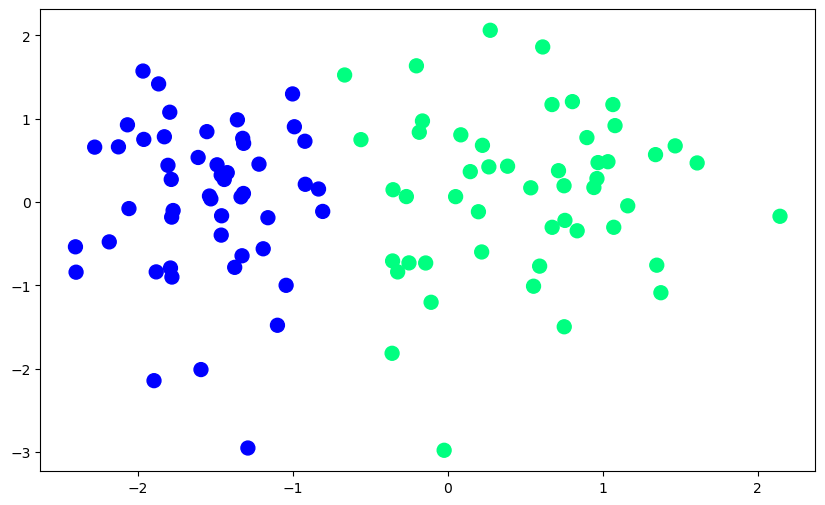

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [6]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)                      # inserted a column which contains 1 (basis)
    weights = np.ones(X.shape[1])                    # initailly random weights 
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)                 # choosing random student 
        y_hat = step(np.dot(X[j],weights))           # predicting model 
        weights = weights + lr*(y[j]-y_hat)*X[j]  
        
    return weights[0],weights[1:]
        

In [7]:
def step(z):
    return 1 if z>0 else 0

In [8]:
intercept_,coef_ = perceptron(X,y)

In [9]:
print(coef_)
print(intercept_)

[1.28959269 0.21008499]
1.0


In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

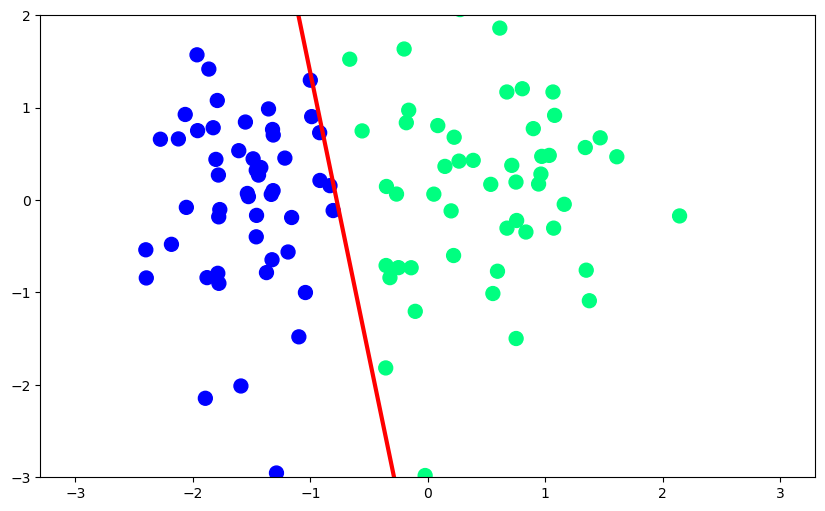

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [13]:
def function(X,y):
    w1=w2=b=1
    lr = 0.01
    
    for j in range(1000):
        for i in range(X.shape[0]):
        
            # check the condition 
            z = w1*X[i][0] + w2*X[i][1] + b

            if y[i]*z  < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b

In [14]:
w1,w2,b = function(X,y)

In [16]:
M = -(w1/w2)
C = -(b/w2)
print(M,C)

-2.3760134239597983 -3.1668528962629434


(-3.0, 2.0)

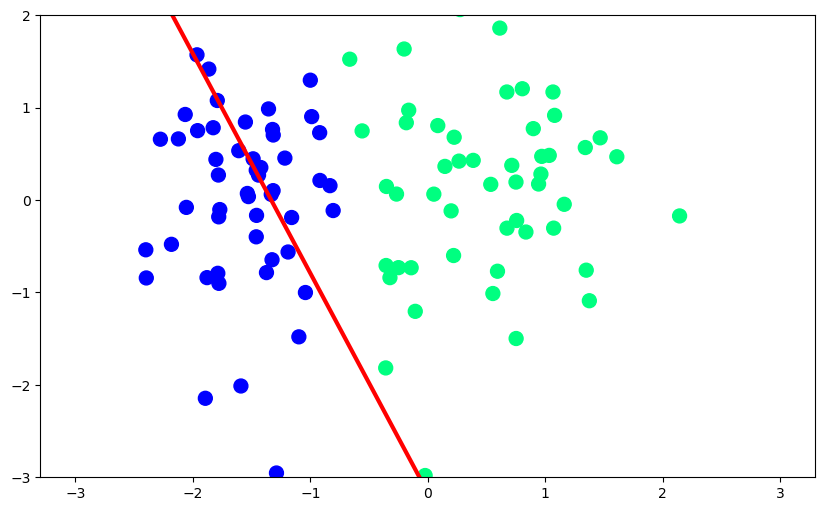

In [17]:
X_input = np.linspace(-3,3,100)
Y_input = M*x_input +C

plt.figure(figsize=(10,6))
plt.plot(X_input,Y_input,color="red",linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,2)
